## Using low dimensional embeddings to discover subtypes of breast cancer

This notebook is largely based on https://towardsdatascience.com/reduce-dimensions-for-single-cell-4224778a2d67 (credit to Nikolay Oskolkov).

https://www.nature.com/articles/s41467-018-07582-3#data-availability

In [1]:
import pandas as pd
import numpy as np
import GEOparse
from matplotlib import pyplot as plt

In [2]:
GEO_ID = "GSE111229" # from the article 

#### Exercise 1. load the dataset into `rna_seq` using GEOparse.

In [3]:
# %load solutions/ex4_1.py
rna_seq = GEOparse.get_GEO(geo=GEO_ID, destdir="./")

16-Jun-2022 11:15:46 DEBUG utils - Directory ./ already exists. Skipping.
16-Jun-2022 11:15:46 INFO GEOparse - File already exist: using local version.
16-Jun-2022 11:15:46 INFO GEOparse - Parsing ./GSE111229_family.soft.gz: 
16-Jun-2022 11:15:46 DEBUG GEOparse - DATABASE: GeoMiame
16-Jun-2022 11:15:46 DEBUG GEOparse - SERIES: GSE111229
16-Jun-2022 11:15:46 DEBUG GEOparse - PLATFORM: GPL13112
16-Jun-2022 11:15:46 DEBUG GEOparse - SAMPLE: GSM3025845
16-Jun-2022 11:15:46 DEBUG GEOparse - SAMPLE: GSM3025846
16-Jun-2022 11:15:46 DEBUG GEOparse - SAMPLE: GSM3025847
16-Jun-2022 11:15:46 DEBUG GEOparse - SAMPLE: GSM3025848
16-Jun-2022 11:15:46 DEBUG GEOparse - SAMPLE: GSM3025849
16-Jun-2022 11:15:46 DEBUG GEOparse - SAMPLE: GSM3025850
16-Jun-2022 11:15:46 DEBUG GEOparse - SAMPLE: GSM3025851
16-Jun-2022 11:15:46 DEBUG GEOparse - SAMPLE: GSM3025852
16-Jun-2022 11:15:46 DEBUG GEOparse - SAMPLE: GSM3025853
16-Jun-2022 11:15:46 DEBUG GEOparse - SAMPLE: GSM3025854
16-Jun-2022 11:15:46 DEBUG GEOpars

16-Jun-2022 11:15:46 DEBUG GEOparse - SAMPLE: GSM3025982
16-Jun-2022 11:15:46 DEBUG GEOparse - SAMPLE: GSM3025983
16-Jun-2022 11:15:46 DEBUG GEOparse - SAMPLE: GSM3025984
16-Jun-2022 11:15:46 DEBUG GEOparse - SAMPLE: GSM3025985
16-Jun-2022 11:15:46 DEBUG GEOparse - SAMPLE: GSM3025986
16-Jun-2022 11:15:46 DEBUG GEOparse - SAMPLE: GSM3025987
16-Jun-2022 11:15:46 DEBUG GEOparse - SAMPLE: GSM3025988
16-Jun-2022 11:15:46 DEBUG GEOparse - SAMPLE: GSM3025989
16-Jun-2022 11:15:46 DEBUG GEOparse - SAMPLE: GSM3025990
16-Jun-2022 11:15:46 DEBUG GEOparse - SAMPLE: GSM3025991
16-Jun-2022 11:15:46 DEBUG GEOparse - SAMPLE: GSM3025992
16-Jun-2022 11:15:46 DEBUG GEOparse - SAMPLE: GSM3025993
16-Jun-2022 11:15:46 DEBUG GEOparse - SAMPLE: GSM3025994
16-Jun-2022 11:15:46 DEBUG GEOparse - SAMPLE: GSM3025995
16-Jun-2022 11:15:46 DEBUG GEOparse - SAMPLE: GSM3025996
16-Jun-2022 11:15:46 DEBUG GEOparse - SAMPLE: GSM3025997
16-Jun-2022 11:15:46 DEBUG GEOparse - SAMPLE: GSM3025998
16-Jun-2022 11:15:46 DEBUG GEOp

16-Jun-2022 11:15:46 DEBUG GEOparse - SAMPLE: GSM3026126
16-Jun-2022 11:15:46 DEBUG GEOparse - SAMPLE: GSM3026127
16-Jun-2022 11:15:46 DEBUG GEOparse - SAMPLE: GSM3026128
16-Jun-2022 11:15:46 DEBUG GEOparse - SAMPLE: GSM3026129
16-Jun-2022 11:15:46 DEBUG GEOparse - SAMPLE: GSM3026130
16-Jun-2022 11:15:46 DEBUG GEOparse - SAMPLE: GSM3026131
16-Jun-2022 11:15:46 DEBUG GEOparse - SAMPLE: GSM3026132
16-Jun-2022 11:15:46 DEBUG GEOparse - SAMPLE: GSM3026133
16-Jun-2022 11:15:46 DEBUG GEOparse - SAMPLE: GSM3026134
16-Jun-2022 11:15:46 DEBUG GEOparse - SAMPLE: GSM3026135
16-Jun-2022 11:15:46 DEBUG GEOparse - SAMPLE: GSM3026136
16-Jun-2022 11:15:46 DEBUG GEOparse - SAMPLE: GSM3026137
16-Jun-2022 11:15:46 DEBUG GEOparse - SAMPLE: GSM3026138
16-Jun-2022 11:15:46 DEBUG GEOparse - SAMPLE: GSM3026139
16-Jun-2022 11:15:46 DEBUG GEOparse - SAMPLE: GSM3026140
16-Jun-2022 11:15:46 DEBUG GEOparse - SAMPLE: GSM3026141
16-Jun-2022 11:15:46 DEBUG GEOparse - SAMPLE: GSM3026142
16-Jun-2022 11:15:46 DEBUG GEOp

16-Jun-2022 11:15:47 DEBUG GEOparse - SAMPLE: GSM3026270
16-Jun-2022 11:15:47 DEBUG GEOparse - SAMPLE: GSM3026271
16-Jun-2022 11:15:47 DEBUG GEOparse - SAMPLE: GSM3026272
16-Jun-2022 11:15:47 DEBUG GEOparse - SAMPLE: GSM3026273
16-Jun-2022 11:15:47 DEBUG GEOparse - SAMPLE: GSM3026274
16-Jun-2022 11:15:47 DEBUG GEOparse - SAMPLE: GSM3026275
16-Jun-2022 11:15:47 DEBUG GEOparse - SAMPLE: GSM3026276
16-Jun-2022 11:15:47 DEBUG GEOparse - SAMPLE: GSM3026277
16-Jun-2022 11:15:47 DEBUG GEOparse - SAMPLE: GSM3026278
16-Jun-2022 11:15:47 DEBUG GEOparse - SAMPLE: GSM3026279
16-Jun-2022 11:15:47 DEBUG GEOparse - SAMPLE: GSM3026280
16-Jun-2022 11:15:47 DEBUG GEOparse - SAMPLE: GSM3026281
16-Jun-2022 11:15:47 DEBUG GEOparse - SAMPLE: GSM3026282
16-Jun-2022 11:15:47 DEBUG GEOparse - SAMPLE: GSM3026283
16-Jun-2022 11:15:47 DEBUG GEOparse - SAMPLE: GSM3026284
16-Jun-2022 11:15:47 DEBUG GEOparse - SAMPLE: GSM3026285
16-Jun-2022 11:15:47 DEBUG GEOparse - SAMPLE: GSM3026286
16-Jun-2022 11:15:47 DEBUG GEOp

16-Jun-2022 11:15:47 DEBUG GEOparse - SAMPLE: GSM3026414
16-Jun-2022 11:15:47 DEBUG GEOparse - SAMPLE: GSM3026415
16-Jun-2022 11:15:47 DEBUG GEOparse - SAMPLE: GSM3026416
16-Jun-2022 11:15:47 DEBUG GEOparse - SAMPLE: GSM3026417
16-Jun-2022 11:15:47 DEBUG GEOparse - SAMPLE: GSM3026418
16-Jun-2022 11:15:47 DEBUG GEOparse - SAMPLE: GSM3026419
16-Jun-2022 11:15:47 DEBUG GEOparse - SAMPLE: GSM3026420
16-Jun-2022 11:15:47 DEBUG GEOparse - SAMPLE: GSM3026421
16-Jun-2022 11:15:47 DEBUG GEOparse - SAMPLE: GSM3026422
16-Jun-2022 11:15:47 DEBUG GEOparse - SAMPLE: GSM3026423
16-Jun-2022 11:15:47 DEBUG GEOparse - SAMPLE: GSM3026424
16-Jun-2022 11:15:47 DEBUG GEOparse - SAMPLE: GSM3026425
16-Jun-2022 11:15:47 DEBUG GEOparse - SAMPLE: GSM3026426
16-Jun-2022 11:15:47 DEBUG GEOparse - SAMPLE: GSM3026427
16-Jun-2022 11:15:47 DEBUG GEOparse - SAMPLE: GSM3026428
16-Jun-2022 11:15:47 DEBUG GEOparse - SAMPLE: GSM3026429
16-Jun-2022 11:15:47 DEBUG GEOparse - SAMPLE: GSM3026430
16-Jun-2022 11:15:47 DEBUG GEOp

16-Jun-2022 11:15:48 DEBUG GEOparse - SAMPLE: GSM3026558
16-Jun-2022 11:15:48 DEBUG GEOparse - SAMPLE: GSM3026559
16-Jun-2022 11:15:48 DEBUG GEOparse - SAMPLE: GSM3026560
16-Jun-2022 11:15:48 DEBUG GEOparse - SAMPLE: GSM3026561
16-Jun-2022 11:15:48 DEBUG GEOparse - SAMPLE: GSM3026562
16-Jun-2022 11:15:48 DEBUG GEOparse - SAMPLE: GSM3026563
16-Jun-2022 11:15:48 DEBUG GEOparse - SAMPLE: GSM3026564
16-Jun-2022 11:15:48 DEBUG GEOparse - SAMPLE: GSM3026565
16-Jun-2022 11:15:48 DEBUG GEOparse - SAMPLE: GSM3026566
16-Jun-2022 11:15:48 DEBUG GEOparse - SAMPLE: GSM3026567
16-Jun-2022 11:15:48 DEBUG GEOparse - SAMPLE: GSM3026568
16-Jun-2022 11:15:48 DEBUG GEOparse - SAMPLE: GSM3026569
16-Jun-2022 11:15:48 DEBUG GEOparse - SAMPLE: GSM3026570
16-Jun-2022 11:15:48 DEBUG GEOparse - SAMPLE: GSM3026571
16-Jun-2022 11:15:48 DEBUG GEOparse - SAMPLE: GSM3026572
16-Jun-2022 11:15:48 DEBUG GEOparse - SAMPLE: GSM3026573
16-Jun-2022 11:15:48 DEBUG GEOparse - SAMPLE: GSM3026574
16-Jun-2022 11:15:48 DEBUG GEOp

In [4]:
dir(rna_seq)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__metaclass__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_get_metadata_as_string',
 '_get_object_as_soft',
 '_phenotype_data',
 'database',
 'download_SRA',
 'download_supplementary_files',
 'geotype',
 'get_accession',
 'get_metadata_attribute',
 'get_type',
 'gpls',
 'gsms',
 'merge_and_average',
 'metadata',
 'name',
 'phenotype_data',
 'pivot_and_annotate',
 'pivot_samples',
 'relations',
 'show_metadata',
 'to_soft']

In [5]:
rna_seq.download_SRA??

In [6]:
rna_seq.geotype

'SERIES'

In [7]:
rna_seq.phenotype_data.shape

(768, 37)

In [8]:
rna_seq.phenotype_data.shape

(768, 37)

In [9]:
rna_seq.to_soft('test', False)

In [10]:
cafs = pd.read_csv('data/CAFs.txt', sep='\t')

In [11]:
sorted(cafs.cluster.unique())

[1, 2, 3, 4]

In [12]:
expr = cafs

### The expression matrix
716 cells has been sequenced, and the expression levels has been assessed for 558 genes. Arranging the cells as rows and genes as columns we obtain an *expression matrix*.

In [13]:
expr.shape

(716, 558)

In [14]:
expr

,1110020A21Rik,1110046J04Rik,1190002F15Rik,1500015A07Rik,1500015O10Rik,1700010K23Rik,1700012D01Rik,1810011H11Rik,2010204K13Rik,2310057J18Rik,...,Wif1,Wisp2,Yy2,Zfp2,Zfp36,Zfp454,Zfp652os,Zfp81,Zfp944,cluster
SS2_15_0048_A3,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,107.526495,0.0,201.533078,0.000000,0.0,0.0,0.000000,1
SS2_15_0048_A6,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,230.755035,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,175.071938,0.000000,0.0,0.0,0.000000,1
SS2_15_0048_A5,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,375.177236,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,290.743379,0.000000,0.0,0.0,0.000000,1
SS2_15_0048_A4,0.000000,0.0,0.000000,0.0,891.488043,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,2
SS2_15_0048_A1,43.324338,0.0,0.000000,0.0,0.000000,0.0,0.0,20.527119,65.766243,0.000000,...,0.0,0.0,0.000000,0.0,768.997431,0.000000,0.0,0.0,2.413509,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SS2_15_0049_P19,0.000000,0.0,0.000000,0.0,1012.999120,0.0,0.0,0.000000,37.231979,0.000000,...,0.0,0.0,21.453518,0.0,19.602162,1.869748,0.0,0.0,34.520490,3
SS2_15_0049_P18,37.696628,0.0,0.000000,0.0,1562.238996,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,41.641731,0.000000,0.0,0.0,0.000000,2
SS2_15_0049_P21,0.000000,0.0,53.257827,0.0,5.817578,0.0,0.0,112.228306,62.542484,19.583052,...,0.0,0.0,0.000000,0.0,70.246018,0.000000,0.0,0.0,0.000000,1
SS2_15_0049_P23,0.000000,0.0,0.000000,0.0,2411.205731,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,55.993812,2


Before going further, try to reflect for a moment how you would try to illuminate any pattern in this data, given what you already know.

#### Plot the expression matrix

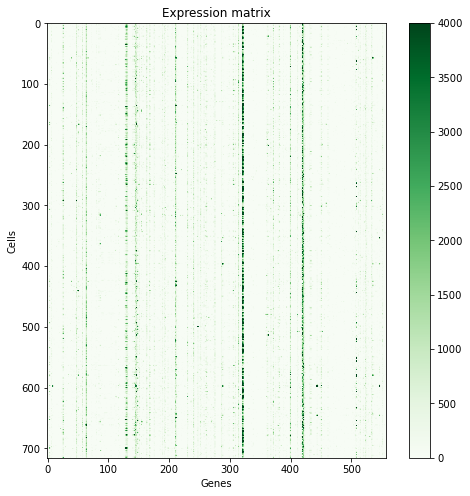

In [15]:
plt.figure(figsize=(8,8))
plt.imshow(expr.values, cmap='Greens', vmax=4000, vmin=0)
plt.title('Expression matrix')
plt.ylabel('Cells')
plt.xlabel('Genes')
plt.colorbar()
plt.show()

#### Exercise 2. The data is very sparse (most entries are zero), can you quantify how sparse it is? (i.e. how many of the entries are 0) 

In [16]:
# %load solutions/ex4_2.py
np.count_nonzero(expr.values) / np.prod(expr.shape)

# only 20% of the entries are non-zero.

0.19622154141887427

In [17]:
print("\n" + "Dimensions of input file: " + str(expr.shape) + "\n")
print("\n" + "Last column corresponds to cluster assignments: " + "\n")
print(expr.iloc[0:4, (expr.shape[1]-4):expr.shape[1]])
X = expr.values[:,0:(expr.shape[1]-1)]
Y = expr.values[:,expr.shape[1]-1] #cluster
X = np.log(X + 1)


Dimensions of input file: (716, 558)


Last column corresponds to cluster assignments: 

                Zfp652os  Zfp81  Zfp944  cluster
SS2_15_0048_A3       0.0    0.0     0.0        1
SS2_15_0048_A6       0.0    0.0     0.0        1
SS2_15_0048_A5       0.0    0.0     0.0        1
SS2_15_0048_A4       0.0    0.0     0.0        2


In [18]:
cafs.dtypes.unique()

array([dtype('float64'), dtype('int64')], dtype=object)

### Decomposing the signals
Now that we have gained some basic understanding of the data, we see it is fit for machine learning. You have already seen a few techniques to reduce data dimensionality reduction. We start with PCA

In [19]:
from sklearn.decomposition import PCA

In [20]:
#from matplotlib import cm
#dir(cm) # available colors

#### Exercise 3. Perform PCA on the expression data and visualize the results (with colors to represent the ground truth clusters)

Text(0, 0.5, 'PC2')

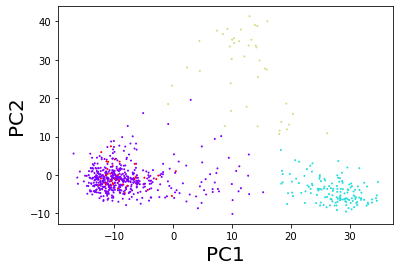

In [21]:
# %load solutions/ex4_3.py
model = PCA()
pca = model.fit_transform(X)
plt.scatter(pca[:, 0], pca[:, 1], c = Y, cmap = 'rainbow', s = 1)
plt.xlabel("PC1", fontsize = 20); plt.ylabel("PC2", fontsize = 20)

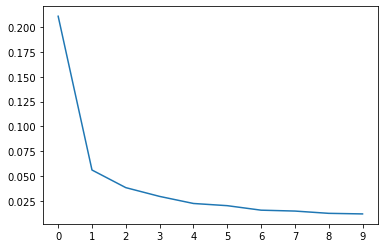

In [22]:
plt.plot(model.explained_variance_ratio_[:10])
plt.xticks(range(10));plt.show()

PCA is completely unsupervised. Linear discriminant analysis (LDA) is often used for the same purpose as PCA (dimensionality reduction), but is strictly speaking not unsupervised.

In [23]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

        Gene      Score
422    Rn45s  39.249111
64       B2m  12.880958
212     Fth1   8.174487
287    Lars2   7.385672
147     Cst3   6.857356
315   Malat1   6.290840
420     Rgs5   4.681367
524    Timp1   4.486659
131   Col3a1   3.229705
130   Col1a2   3.062976
537  Trmt61b   3.020343
145    Crip1   2.991499
322      Mgp   2.787057
368      Mt1   2.673895
400    Postn   2.401428
534     Tpm1   2.258763
248    Hspa5   2.133318
241   Higd1b   2.094767
220     Ggt1   2.003810
122    Cldn4   1.951643


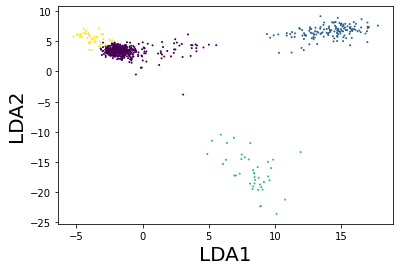

In [24]:
model = LinearDiscriminantAnalysis(n_components = 2, priors = None, shrinkage = 'auto', 
                                   solver = 'eigen', store_covariance = False, tol = 0.0001)
lda = model.fit_transform(X, Y)
plt.scatter(lda[:, 0], lda[:, 1], c = Y, cmap = 'viridis', s = 1)
plt.xlabel("LDA1", fontsize = 20); plt.ylabel("LDA2", fontsize = 20)
feature_importances = pd.DataFrame({'Gene':np.array(expr.columns)[:-1], 
                                    'Score':abs(model.coef_[0])})
print(feature_importances.sort_values('Score', ascending = False).head(20))

The way to interpret the data above: we clearly see the data lay in three clusters, suggesting  we have found 3 different separable expression-signatures. However, we also see one cluster is occupied by 2 clusters (the colors are imposed by the fact that we know the "ground truth", but unsupervised methods are generally used for data exploration in which we do not know of these things.

# Non-linear methods

# t-SNE

t-SNE is a very popular decomposition technique used in molecular biology, especially for visualization purposes. t-SNE does generally not cope well with high dimensionality, so it is common to first transform the data with PCA and then run this through t-SNE. Here we will do both with and without prereducing the dimensionality.

In [25]:
from sklearn.manifold import TSNE

In [26]:
model = TSNE(learning_rate = 10, n_components = 2, random_state = 123, perplexity = 30)
tsne = model.fit_transform(X)

F:\miniconda\envs\cbmTest\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


Text(0, 0.5, 'tSNE2')

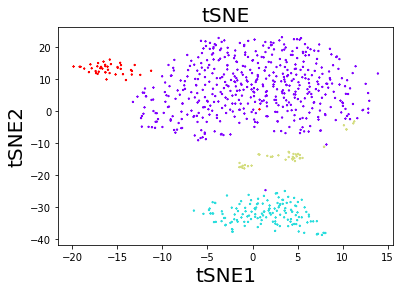

In [27]:
plt.scatter(tsne[:, 0], tsne[:, 1], c = Y, cmap = 'rainbow', s = 2, marker='x')
plt.title('tSNE', fontsize = 20)
plt.xlabel("tSNE1", fontsize = 20)
plt.ylabel("tSNE2", fontsize = 20)

#### Exercise 4. Reduce the data first with PCA to 30 principal components, then rerun the tSNE on this transformed data. 

F:\miniconda\envs\cbmTest\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


Text(0, 0.5, 'tSNE2')

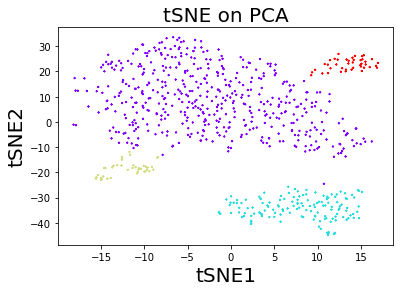

In [28]:
# %load solutions/ex4_4.py
X_reduced = PCA(n_components = 30).fit_transform(X)
model = TSNE(learning_rate = 10, n_components = 2, random_state = 123, perplexity = 30)
tsne = model.fit_transform(X_reduced)

plt.scatter(tsne[:, 0], tsne[:, 1], c = Y, cmap = 'rainbow', s = 2, marker='x')
plt.title('tSNE on PCA', fontsize = 20)
plt.xlabel("tSNE1", fontsize = 20)
plt.ylabel("tSNE2", fontsize = 20)

While it can be hard to discern the performance boost of prereduction, we can certainly see that t-SNE performs better than a linear method like PCA. However, non-linearity is no guarantee of success itself. For instance Isomap does not do well with this data.

In [29]:
from sklearn.manifold import Isomap

Text(0, 0.5, 'ISO2')

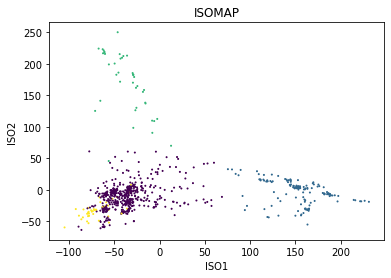

In [30]:
model = Isomap()
isomap = model.fit_transform(X)
plt.scatter(isomap[:, 0], isomap[:, 1], c = Y, cmap = 'viridis', s = 1)
plt.title('ISOMAP')
#plt.colorbar()
plt.xlabel("ISO1")
plt.ylabel("ISO2")

We should not throw Isomap out the window yet, like most algorithm, there is no one-size-fits-all. Isomap is well suited for tasks without clear clusters, but continuous change is present. 

# UMAP
A more recent alternative to t-SNE is [UMAP](https://arxiv.org/abs/1802.03426), which also produces high quality visualizations with good separation, and scales better than t-sne with large datasets.

In [31]:
from umap import UMAP

In [32]:
print("Performing Uniform Manifold Approximation and Projection (UMAP) ...")
#model = UMAP(n_neighbors = 30, min_dist = 0.3, n_components = 2)
model = UMAP()
umap = model.fit_transform(X) # or X_reduced

Performing Uniform Manifold Approximation and Projection (UMAP) ...


Text(0, 0.5, 'UMAP2')

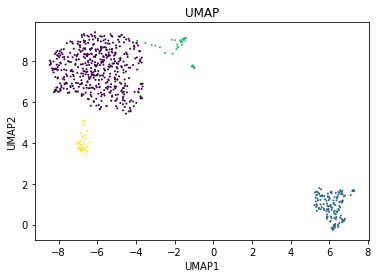

In [33]:
plt.scatter(umap[:, 0], umap[:, 1], c = Y, cmap = 'viridis', s = 1)
plt.title('UMAP')
#plt.colorbar()
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")

#### Conclusion
In summary, when doing data exploration of gene expression (and other biomedical data), non-linear methods are preferred to linear ones.